## Landscape Characteristics notebook
This notebook imports a .py file (<code>Landscapes.py</code>) that implements Kaufmann style NK landscapes as well as some novel types along with some measures for comparing features of the landscapes.

The landscape-making functions all return a Pandas DataFrame indexed by this characteristics strings, e.g, "10101", i.e. the location on the hypercube. Each has a column for the fitness associated with that location and another containing the location stored as a tuple of integers (instead of a string of numerals).



In [1]:
from Landscapes import *
from random import choice
import operator

## Landscapes as Networks

The correct way to think about NK landscapes is as hypercubes, which is a unique type of network topology. This allows us to bring the tools of network analysis to the problem of characterizing the landscapes. Hypercubes are regular networks so things like the basic centrality measures won't be helpful, but that still leaves a lot to work with!

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


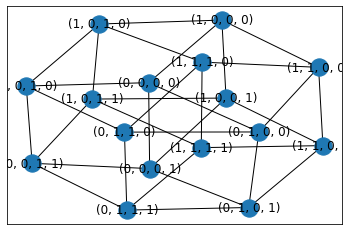

In [3]:
graph = landscape_as_graph(make_NK_land(4,3))
nx.draw_networkx(graph)

### Paths versus journeys
Below you'll see code blocks for looking at the distribution of weighted shortest path lengths, i.e. Dijkstra paths. The weights of the edges are the absolute values of the difference in fitnesses. The idea is that the shortest weighted path should be the best route to "climb" to the peak. The more short paths, the easier it is to find the top. 

The Dijkstra algorithm can't handle negative weights, hence the absolute value. There are algos (i.e. Bellman-Ford and Floyd-Warshall) that can find negative values as long as there aren't "negative cycles" but apparently there are negative cycles. I'll have to think about that.

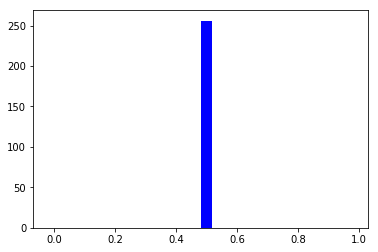

In [2]:
NK_land_K0 = make_NK_land(8,0)
graph80 = landscape_as_graph(NK_land_K0)
cents80 = nx.betweenness_centrality(graph80,weight='fitness_difference')

Counts, bins, patches80 = plt.hist(cents80.values(),bins=26,range=(0,1),color="b",align="left")

(array([   0.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

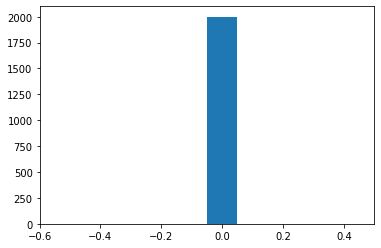

In [117]:
plt.hist(climb_landscape(graph80),align="left")

(array([   0.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

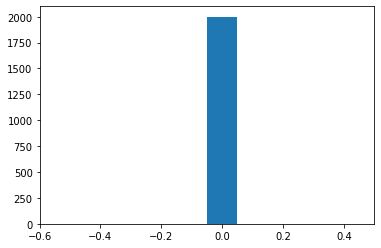

In [118]:
plt.hist(climb_landscape(graph80,climb_type="next_best"),align="left")

(array([141., 132., 171., 314., 224., 228., 332., 185., 141., 132.]),
 array([0.        , 0.03360323, 0.06720646, 0.10080968, 0.13441291,
        0.16801614, 0.20161937, 0.2352226 , 0.26882582, 0.30242905,
        0.33603228]),
 <a list of 10 Patch objects>)

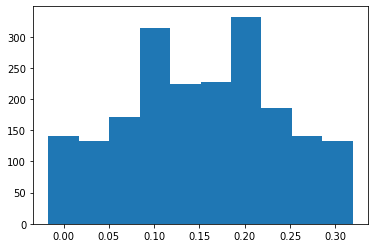

In [165]:
plt.hist(climb_landscape(graph80,climb_type="random"),align="left")

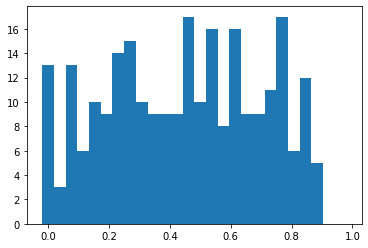

In [142]:
NK_land_K7 = make_NK_land(8,7)
graph87 = landscape_as_graph(NK_land_K7)
cents_87 = nx.betweenness_centrality(graph87,weight='fitness_difference')

Counts, bins, patches87 = plt.hist(cents_87.values(),bins=26,range=(0,1),align="left")

(array([1541.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         459.]),
 array([0.        , 0.00198181, 0.00396362, 0.00594543, 0.00792724,
        0.00990905, 0.01189086, 0.01387267, 0.01585449, 0.0178363 ,
        0.01981811]),
 <a list of 10 Patch objects>)

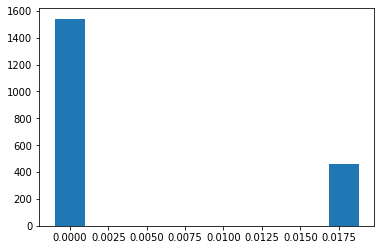

In [154]:
plt.hist(climb_landscape(graph87,vision_length=3),align="left")

(array([1421.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         579.]),
 array([0.        , 0.00198181, 0.00396362, 0.00594543, 0.00792724,
        0.00990905, 0.01189086, 0.01387267, 0.01585449, 0.0178363 ,
        0.01981811]),
 <a list of 10 Patch objects>)

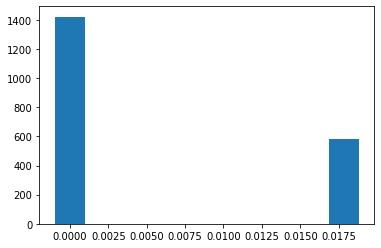

In [155]:
plt.hist(climb_landscape(graph87,vision_length=3,climb_type="next_best"),align="left")

(array([121., 179., 285., 454., 416., 280., 120.,  87.,  34.,  24.]),
 array([0.        , 0.05358231, 0.10716463, 0.16074694, 0.21432925,
        0.26791157, 0.32149388, 0.37507619, 0.42865851, 0.48224082,
        0.53582313]),
 <a list of 10 Patch objects>)

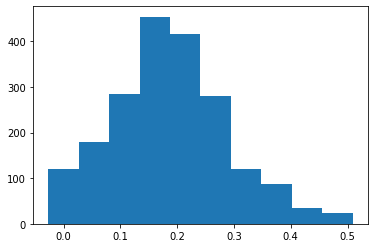

In [164]:
plt.hist(climb_landscape(graph87,climb_type="random"),align="left")

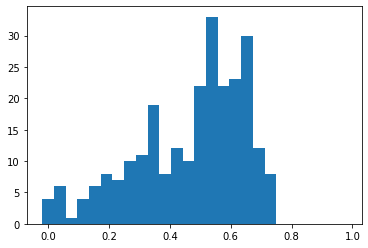

In [146]:
landscape_sorted = sorted_from_NK(NK_land_K7)
graph87_sorted = landscape_as_graph(landscape_sorted)
cents_sorted_87 = nx.betweenness_centrality(graph87_sorted,weight='fitness_difference')
Count_sorted_87, bins, patches = plt.hist(cents_sorted_87.values(),bins=26,range=(0,1),align="left")

(array([   0.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

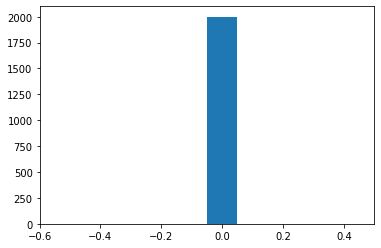

In [147]:
plt.hist(climb_landscape(graph87_sorted),align="left")

(array([   0.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

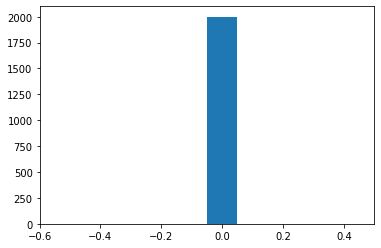

In [148]:
plt.hist(climb_landscape(graph87_sorted,climb_type="next_best"),align="left")

(array([ 95., 186., 298., 486., 402., 290.,  99.,  85.,  38.,  21.]),
 array([0.        , 0.05358231, 0.10716463, 0.16074694, 0.21432925,
        0.26791157, 0.32149388, 0.37507619, 0.42865851, 0.48224082,
        0.53582313]),
 <a list of 10 Patch objects>)

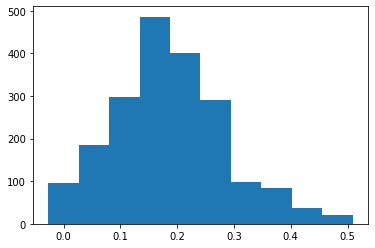

In [163]:
plt.hist(climb_landscape(graph87_sorted,climb_type="random"),align="left")

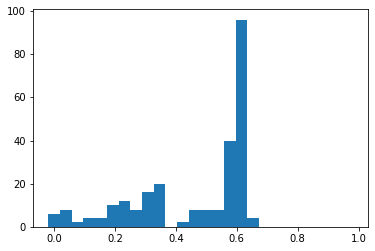

In [149]:
landscape_sorted = sorted_from_NK(NK_land_K0)
graph80_sorted = landscape_as_graph(landscape_sorted)
cents_sorted_80 = nx.betweenness_centrality(graph80_sorted,weight='fitness_difference')
Count_sorted_80, bins, patches = plt.hist(cents_sorted_80.values(),bins=26,range=(0,1),align="left")

(array([   0.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

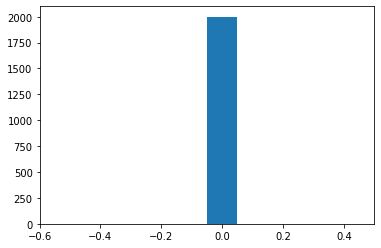

In [150]:
plt.hist(climb_landscape(graph80_sorted),align="left")

(array([   0.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

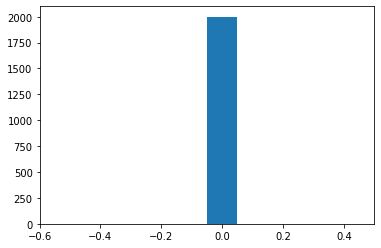

In [151]:
plt.hist(climb_landscape(graph80_sorted,climb_type="next_best"),align="left")

(array([114., 121., 188., 357., 239., 221., 314., 189., 125., 132.]),
 array([0.        , 0.03360323, 0.06720646, 0.10080968, 0.13441291,
        0.16801614, 0.20161937, 0.2352226 , 0.26882582, 0.30242905,
        0.33603228]),
 <a list of 10 Patch objects>)

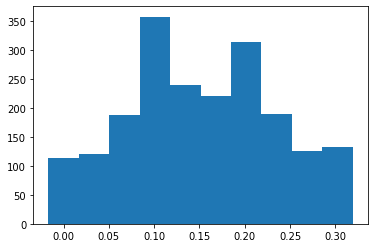

In [162]:
plt.hist(climb_landscape(graph80_sorted,climb_type="random"),align="left")

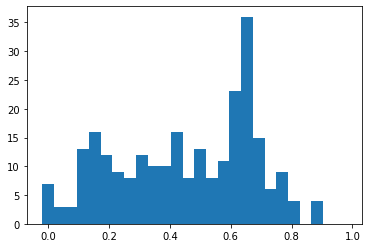

In [139]:
N=8
K1=0
K2=7
NK1 = make_NK_land(N,K1)
NK2 = make_NK_land(N,K2)
layer_land = layer_landscapes(NK1,NK2)
graph_layered = landscape_as_graph(layer_land)
cents_layered = nx.betweenness_centrality(graph_layered,weight='fitness_difference')

Count_layered, bins, patches = plt.hist(cents_layered.values(),bins=26,range=(0,1),align="left")

(array([1183.,    0.,  699.,    0.,    0.,    0.,    0.,    0.,    0.,
         118.]),
 array([0.        , 0.00499818, 0.00999635, 0.01499453, 0.0199927 ,
        0.02499088, 0.02998905, 0.03498723, 0.0399854 , 0.04498358,
        0.04998176]),
 <a list of 10 Patch objects>)

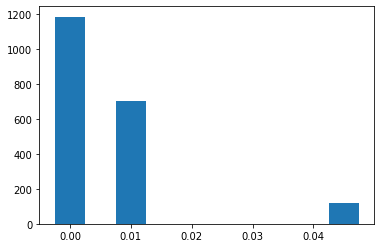

In [152]:
plt.hist(climb_landscape(graph_layered,vision_length=3),align="left")

(array([735.,   0., 996.,   0.,   0.,   0.,   0.,   0.,   0., 269.]),
 array([0.        , 0.00499818, 0.00999635, 0.01499453, 0.0199927 ,
        0.02499088, 0.02998905, 0.03498723, 0.0399854 , 0.04498358,
        0.04998176]),
 <a list of 10 Patch objects>)

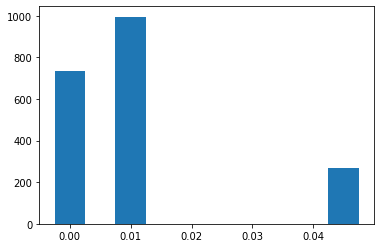

In [153]:
plt.hist(climb_landscape(graph_layered,vision_length=3,climb_type="next_best"),align="left")

(array([ 67., 136., 209., 395., 326., 385., 275., 122.,  48.,  37.]),
 array([0.        , 0.06173752, 0.12347504, 0.18521257, 0.24695009,
        0.30868761, 0.37042513, 0.43216265, 0.49390017, 0.5556377 ,
        0.61737522]),
 <a list of 10 Patch objects>)

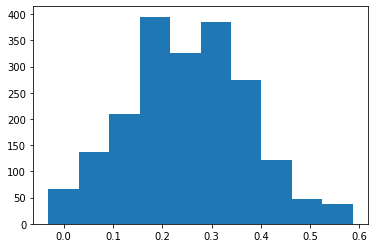

In [161]:
plt.hist(climb_landscape(graph_layered,climb_type="random"),align="left")

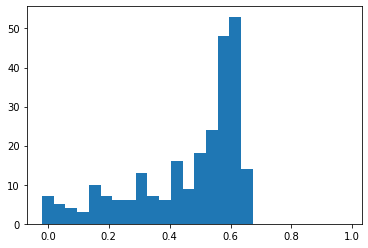

In [156]:
landscape_sorted = sorted_from_NK(layer_land)
graph_layered_sorted = landscape_as_graph(landscape_sorted)
cents_layered_sorted = nx.betweenness_centrality(graph_layered_sorted,weight='fitness_difference')

Count_layered_sorted,bins,patchs=plt.hist(cents_layered_sorted.values(),bins=26,range=(0,1),align="left")

(array([   0.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

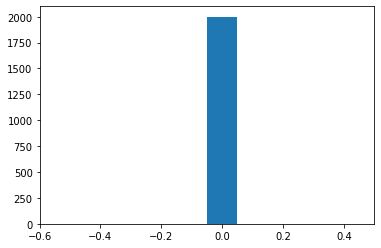

In [157]:
plt.hist(climb_landscape(graph_layered_sorted),align="left")

(array([   0.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

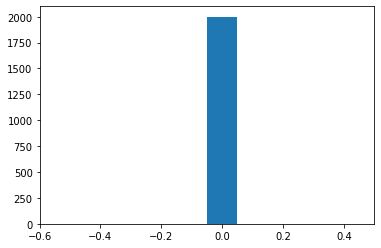

In [158]:
plt.hist(climb_landscape(graph_layered_sorted,climb_type="next_best"),align="left")

(array([ 59., 130., 191., 459., 301., 369., 293., 118.,  56.,  24.]),
 array([0.        , 0.06173752, 0.12347504, 0.18521257, 0.24695009,
        0.30868761, 0.37042513, 0.43216265, 0.49390017, 0.5556377 ,
        0.61737522]),
 <a list of 10 Patch objects>)

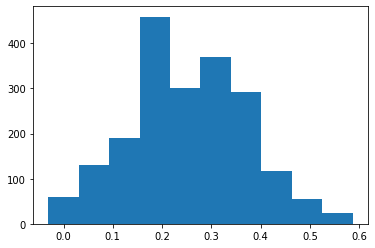

In [160]:
plt.hist(climb_landscape(graph_layered_sorted,climb_type="random"),align="left")

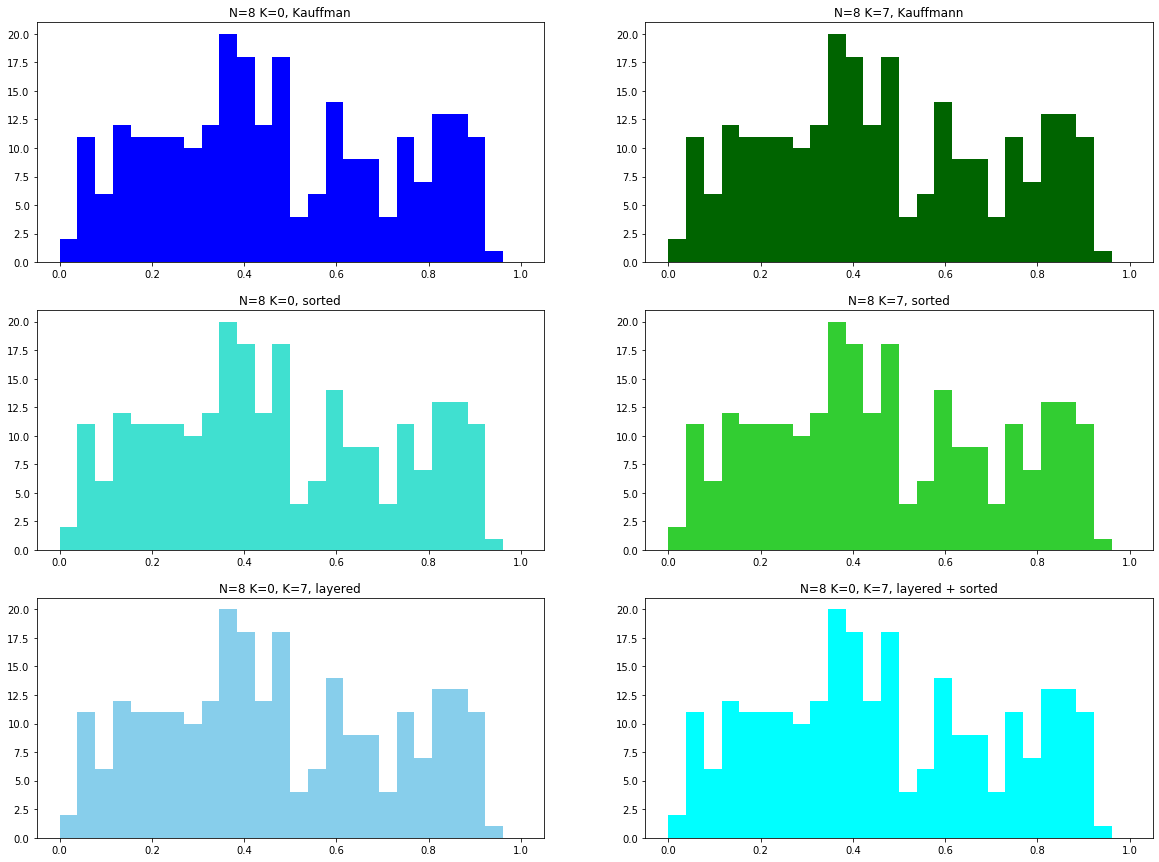

In [137]:
fig, ((ax0, ax1), (ax2, ax3),(ax4,ax5)) = plt.subplots(nrows=3, ncols=2,figsize=(20, 15))

ax0.hist(cents80.values(),bins=26,range=(0,1),color="b")
ax0.set_title('N=8 K=0, Kauffman')

ax1.hist(cents_87.values(),bins=26,range=(0,1), color="darkgreen")
ax1.set_title('N=8 K=7, Kauffmann')

ax2.hist(cents_sorted_80.values(),bins=26,range=(0,1),color="turquoise")
ax2.set_title('N=8 K=0, sorted')

ax3.hist(cents_sorted_87.values(),bins=26,range=(0,1),color="limegreen")
ax3.set_title('N=8 K=7, sorted')

ax4.hist(cents_layered.values(),bins=26,range=(0,1), color="skyblue")
ax4.set_title('N=8 K=0, K=7, layered')

ax5.hist(cents_layered_sorted.values(),bins=26,range=(0,1), color="aqua")
ax5.set_title('N=8 K=0, K=7, layered + sorted')


plt.show()

In [159]:
def climb_landscape(graph,vision_length=1,climbs=2000,climb_type="highest"):
    node_dict = nx.get_node_attributes(graph,"fitness")
    max_location, max_fitness = max(node_dict.items(), key=operator.itemgetter(1))
    dist_to_top = []
    for climb in range(climbs):
        current_index = choice(list(graph.nodes()))
        current_genome = graph.node[current_index]
        current_fitness = current_genome["fitness"]
        maxed_out = False
        random_walk_length = 150
        while not maxed_out: 
            neighbor_list = list(nx.single_source_shortest_path_length(graph,
                                                                       source=current_index,
                                                                       cutoff=vision_length).keys()) # gets neighbor indices
            changed = False
            random.shuffle(neighbor_list)
            if climb_type == "random":
                if random_walk_length > 0:
                    current_index = neighbor_list[0]
                    current_fitness = graph.node[current_index]["fitness"]
                    random_walk_length -= 1
                else:
                    maxed_out = True
            
            else:
                for neighbor in neighbor_list:
                    neigh_fitness = graph.node[neighbor]["fitness"]
                    if neigh_fitness > current_fitness:
                        if climb_type == "next_best":
                            current_index = neighbor
                            current_fitness = neigh_fitness
                            changed = True
                            break
                        elif climb_type =="highest":
                            current_index = neighbor
                            current_fitness = neigh_fitness
                            changed = True
                if not changed:
                    maxed_out = True

        dist_to_top.append(max_fitness - current_fitness)
    return dist_to_top
    

In [102]:
list(nx.single_source_shortest_path_length(graph ,source=choice(list(graph.nodes())), cutoff=2).keys())


[(1, 1, 1, 0, 0, 1, 1, 0),
 (0, 1, 1, 0, 0, 1, 1, 0),
 (1, 0, 1, 0, 0, 1, 1, 0),
 (1, 1, 0, 0, 0, 1, 1, 0),
 (1, 1, 1, 0, 0, 0, 1, 0),
 (1, 1, 1, 0, 0, 1, 0, 0),
 (1, 1, 1, 1, 0, 1, 1, 0),
 (1, 1, 1, 0, 1, 1, 1, 0),
 (1, 1, 1, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 1, 1, 0),
 (0, 1, 0, 0, 0, 1, 1, 0),
 (0, 1, 1, 0, 0, 0, 1, 0),
 (0, 1, 1, 0, 0, 1, 0, 0),
 (0, 1, 1, 1, 0, 1, 1, 0),
 (0, 1, 1, 0, 1, 1, 1, 0),
 (0, 1, 1, 0, 0, 1, 1, 1),
 (1, 0, 0, 0, 0, 1, 1, 0),
 (1, 0, 1, 0, 0, 0, 1, 0),
 (1, 0, 1, 0, 0, 1, 0, 0),
 (1, 0, 1, 1, 0, 1, 1, 0),
 (1, 0, 1, 0, 1, 1, 1, 0),
 (1, 0, 1, 0, 0, 1, 1, 1),
 (1, 1, 0, 0, 0, 0, 1, 0),
 (1, 1, 0, 0, 0, 1, 0, 0),
 (1, 1, 0, 1, 0, 1, 1, 0),
 (1, 1, 0, 0, 1, 1, 1, 0),
 (1, 1, 0, 0, 0, 1, 1, 1),
 (1, 1, 1, 0, 0, 0, 0, 0),
 (1, 1, 1, 1, 0, 0, 1, 0),
 (1, 1, 1, 0, 1, 0, 1, 0),
 (1, 1, 1, 0, 0, 0, 1, 1),
 (1, 1, 1, 1, 0, 1, 0, 0),
 (1, 1, 1, 0, 1, 1, 0, 0),
 (1, 1, 1, 0, 0, 1, 0, 1),
 (1, 1, 1, 1, 1, 1, 1, 0),
 (1, 1, 1, 1, 0, 1, 1, 1),
 (1, 1, 1, 0, 1, 1, 1, 1)]

In [ ]:
N=10
K=7
concentration_params =  [.025,.025, 0.025, .10,.55,.10,.10,.025,.025,0.025]
scalar = 1

graph = landscape_as_graph(make_Dirichland(N,K,concentration_params,scalar))
lengths = nx.all_pairs_dijkstra_path(graph,weight='fitness_difference')
all_distances = []
for source, targets in lengths:
    for target, distance in targets.items():
        all_distances.append(distance)
plt.hist(all_distances)

## Looking at total weights of all paths to peak from minimum

Difference btw min and max fitness 0.2406622464057227
Number of paths a weight equal to the difference (e.g. positive paths): 5040
Percentage positive paths 0.00089126559714795


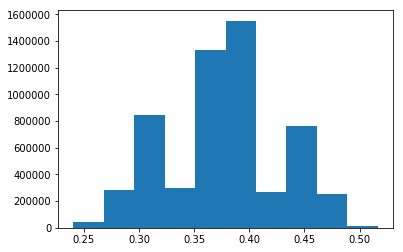

In [23]:
N,K=7,0
landscapeNK = make_NK_land(N,K)
paths_NK0=path_lengths(landscapeNK,cutoff=11)

Difference btw min and max fitness 0.5856061399121492
Number of paths a weight equal to the difference (e.g. positive paths): 1799
Percentage positive paths 0.0020112783636087187


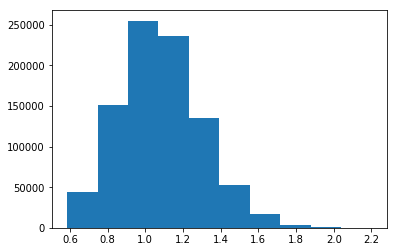

In [22]:
N,K=7,2
landscape = make_NK_land(N,K)
paths_NK5=path_lengths(landscape,cutoff=11)

In [21]:
#graph = landscape_as_graph(landscape)
#labels = {}
#for node,fitness in graph.nodes().data():
#    labels[node] = round(fitness["fitness"],3)
#nx.draw_networkx(graph,labels=labels)

Difference btw min and max fitness 0.4961923422185671
Number of paths a weight equal to the difference (e.g. positive paths): 122
Percentage positive paths 2.5816991389398528e-05


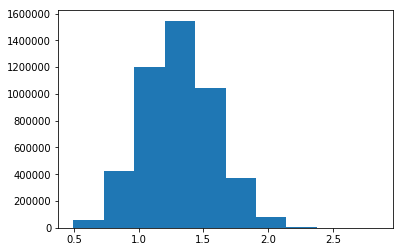

In [6]:
N,K=7,5
landscape = make_NK_land(N,K)
paths_NK5=path_lengths(landscape,cutoff=11)

Difference btw min and max fitness 0.45333138389175404
Number of paths a weight equal to the difference (e.g. positive paths): 5040
Percentage positive paths 0.00089126559714795


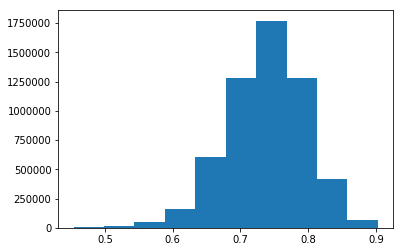

In [28]:
N,K=7,5
landscape= sorted_NK_landscape(N,K)
paths_sorted = path_lengths(landscape,cutoff=11)

Difference btw min and max fitness 0.2406622464057227
Number of paths a weight equal to the difference (e.g. positive paths): 5040
Percentage positive paths 0.00089126559714795


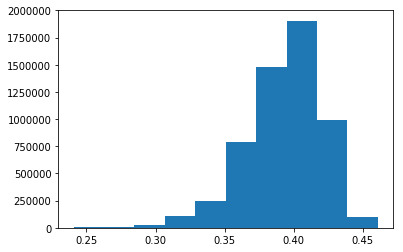

In [26]:
landscapeNK = landscape
landscape_sorted = sorted_from_NK(landscapeNK)
paths_sorted_from = path_lengths(landscape_sorted,cutoff=11)

Difference btw min and max fitness 0.3296146763109925
Number of paths a weight equal to the difference (e.g. positive paths): 133
Percentage positive paths 2.5263461816081997e-05


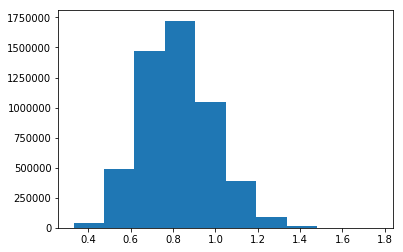

In [18]:
N = 7
K1,K2 = 0,5
landscape = layer_landscapes(make_NK_land(N,K1),make_NK_land(N,K2),layering_mode="average",weights=[1,1])
paths_layered = path_lengths(landscape,cutoff=11)

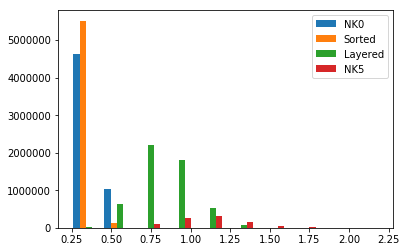

In [29]:
plt.hist([paths_NK0,paths_sorted_from,paths_layered,paths_NK5],label=["NK0","Sorted", "Layered","NK5"])
plt.legend()

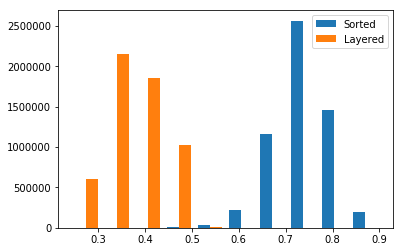

In [31]:
plt.hist([paths_sorted,paths_NK0],label=["Sorted", "NK0"])
plt.legend()

In [2]:
graph = landscape_as_graph(make_NK_land(8,6))

In [ ]:
nx.cu

In [5]:
def sorted_from_NK(landscape):
    df = landscape.sort_values(by="Fitness")
    fitnesses = list(df.Fitness)

    hypercube = nx.hypercube_graph(N)
    chosen_peak = tuple((np.random.rand(N)>0.5).astype(int))

    node_dict = nx.shortest_path_length(hypercube, chosen_peak)
    distance_dict = defaultdict(list)
    max_dist = 0
    for key, dist in node_dict.items():
        distance_dict[dist].append(key)
        if dist > max_dist:
            max_dist = dist

    sorted_landscape = {}
    sorted_landscape["".join([str(i) for i in chosen_peak])] = (fitnesses.pop(),chosen_peak)

    for dist in range(1,max_dist+1): # node_dict has zero key...so weird IMHO
        for location in distance_dict[dist]:
            sorted_landscape["".join([str(i) for i in location])] = (fitnesses.pop(),location)

    return pd.DataFrame.from_dict(sorted_landscape,orient="index",columns=["Fitness","Location"])